# Notebook by Matthew Reinhart

Import the relevant files and get a first look and analysis at the bom_df data set

In [171]:
#Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Bom_df Data

In [172]:
# Read the file into the notebook
bom_df=pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [173]:
# Get a first look at the Data
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [174]:
bom_df.shape

(3387, 5)

In [175]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


The foreign_gross column is missing data and it is also not in numeric form as it should be, those are the first few things we will address. It is in the object data type in part because it has some 'NaN'. Now we must analyze the data set and then decide how best to deal with this missing data. 

In [176]:
bom_df['foreign_gross'].tail()

3382    NaN
3383    NaN
3384    NaN
3385    NaN
3386    NaN
Name: foreign_gross, dtype: object

In [177]:
bom_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [178]:
# Check to see how many na is in the foreign gross column
bom_df['foreign_gross'].isna().sum()

1350

In [179]:
# Get rid of the missing data
bom_df.dropna(subset=['foreign_gross'],inplace=True)

In [180]:
# Check to see that it worked
bom_df['foreign_gross'].isna().sum()

0

I decided it would be best to drop the empty rows as I did not want to manipulate or possibly skew the data by using the mean or median. Next I would like to convert the column 'foreign_gross' to numeric form.

In [181]:
# Make the foreign gross column an integer
num_list=[]
for num in bom_df['foreign_gross']:
    x=num.replace(',','')
    y=float(x)
    num_list.append(y)

In [182]:
# Now put that list of it being integers into the data set in place of foreign gross
bom_df['foreign_gross']=num_list

Here I will take this column now in numeric form and add it to the domestic_gross column in a new column, named total_gross

In [183]:
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [184]:
# Make a new column called total_gross
bom_df['total_gross']=bom_df['domestic_gross']+bom_df['foreign_gross']

In [185]:
# Check to see that it came through correctly
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


Sort the data in ways to see if there are any specific trends that can prove useful to us.

In [186]:
# Sorted here by year and total gross to look at recent trends
bom_df.sort_values(by=['year','total_gross'],ascending=False)

,title,studio,domestic_gross,foreign_gross,year,total_gross
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
3083,Aquaman,WB,335100000.0,812700000.0,2018,1.147800e+09
3084,Bohemian Rhapsody,Fox,216400000.0,687200000.0,2018,9.036000e+08
...,...,...,...,...,...,...
230,It's a Wonderful Afterlife,UTV,NaN,1300000.0,2010,NaN
298,Celine: Through the Eyes of the World,Sony,NaN,119000.0,2010,NaN
302,White Lion,Scre.,NaN,99600.0,2010,NaN
306,Badmaash Company,Yash,NaN,64400.0,2010,NaN


Interesting, I see that there are some empty columns in domestic_gross that need to be dealt with, I will handle that now. Similary to the foreign_gross column, I will get rid of those rows

In [187]:
# Find how much missing data there is in domestic gross column
bom_df['domestic_gross'].isna().sum()

28

In [188]:
# Drop the missing 28 rows
bom_df.dropna(subset=['domestic_gross'],inplace=True)

In [189]:
#Confirm that they are gone
bom_df['domestic_gross'].isna().sum()

0

In [190]:
# sort by total gross and studio to see if there are any studios that appear to be doing best
bom_df=bom_df.sort_values(by=['total_gross','studio'],ascending=False)

In [191]:
bom_df.head(20)

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


There is something to notice when looking at which studios produce the highest grossing movies. Here we see that BV has 4 of the top 5 highest grossing movies in the dataset and 8 of the TOP 10

##  Show which studios make the best movies using visualization

While it is interesting that 8 of the top 10 movies come from one studio, ten is not a great sample size to look at, lets widen our scope here and see if a scatter plot can help us visualize

In [192]:
x_ax= bom_df['studio'][:500]
y_ax= bom_df['total_gross'][:500]

''

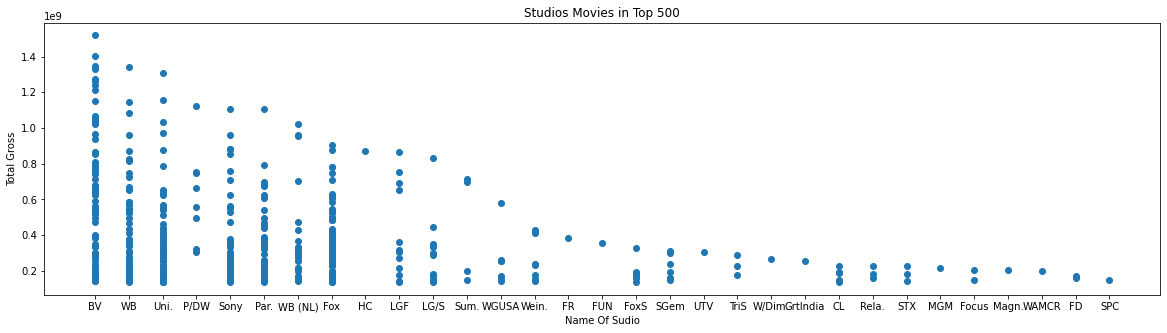

In [193]:
fig, ax = plt.subplots(figsize=(20,5))
ax.scatter(x=x_ax,y=y_ax)
ax.set_xlabel('Name Of Sudio')
ax.set_ylabel('Total Gross')
ax.set_title('Studios Movies in Top 500')
;

A scatter plot does help us see that the first three appear to be the main before a steep drop off but it does not look very good. Potentially a bar graph would be more visually appealling. 

''

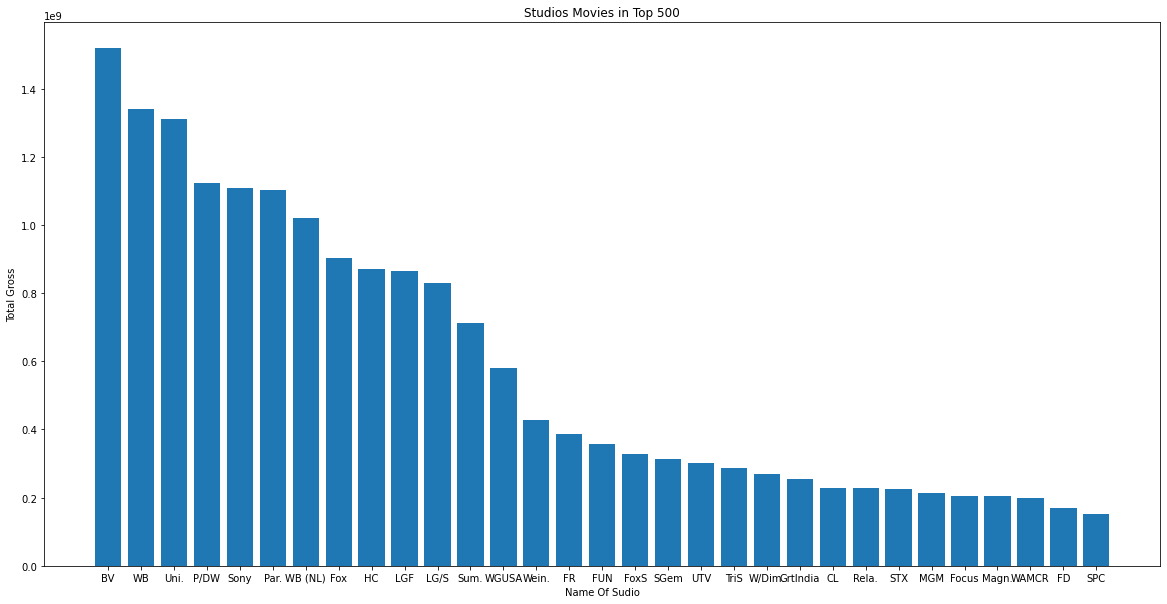

In [194]:
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(x=x_ax,height=y_ax)
ax.set_xlabel('Name Of Sudio')
ax.set_ylabel('Total Gross')
ax.set_title('Studios Movies in Top 500')
;

500 is a much better sample size and it appears as if BV is still far ahead and that there is quite the drop off after those top 3 studios in terms of total gross in the top 500 movies. So, what can we learn from this. Well I would look at the types of movies that BV makes and see if that genre or style is one that we can use. I will also examine WB and Universals top movies.

In [195]:
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09


In [196]:
studios_gross=bom_df.drop(['domestic_gross','foreign_gross','year'],axis=1)
studios_gross=studios_gross.sort_values(by='total_gross',ascending=False)
studios_gross.head()

,title,studio,total_gross
727,Marvel's The Avengers,BV,1.518900e+09
1875,Avengers: Age of Ultron,BV,1.405400e+09
3080,Black Panther,BV,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,1.341500e+09
2758,Star Wars: The Last Jedi,BV,1.332600e+09


In [197]:
top_bv=studios_gross.loc[studios_gross['studio']=='BV']

In [198]:
top_bv.head(10)

,title,studio,total_gross
727,Marvel's The Avengers,BV,1.518900e+09
1875,Avengers: Age of Ultron,BV,1.405400e+09
3080,Black Panther,BV,1.347000e+09
2758,Star Wars: The Last Jedi,BV,1.332600e+09
1127,Frozen,BV,1.276400e+09
2759,Beauty and the Beast (2017),BV,1.263500e+09
3082,Incredibles 2,BV,1.242800e+09
1128,Iron Man 3,BV,1.214800e+09
2322,Captain America: Civil War,BV,1.153300e+09
0,Toy Story 3,BV,1.067000e+09


Interesting, so 6 out of 10 of these movies are rated PG-13 based on my own research. Those would be--- Marvel's: The Avengers, Avengers: Age of Ultron, Black Panther, Star Wars: The Last Jedi, Iron Man 3, Captain America: Civil War.
Then three others are rated PG. Those being, Frozen, Beauty and the Beast and Incredibles 2. Finally there is Toy Story 3 which got a G rating. These movies are mainly fiction though and many are part of franchises so that can also be another thing to note. Another thing to note is that half of these come from comic books to a certain extent. If one wants more information on any of these movies or other top movies that have come out from the studio they can find it at https://www.newsweek.com/20-highest-grossing-disney-movies-all-time-star-wars-frozen-1600957

In [199]:
top_wb=studios_gross.loc[studios_gross['studio']=='WB']

In [200]:
top_wb.head(10)

,title,studio,total_gross
328,Harry Potter and the Deathly Hallows Part 2,WB,1.341500e+09
3083,Aquaman,WB,1.147800e+09
729,The Dark Knight Rises,WB,1.084900e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,9.603000e+08
2328,Batman v Superman: Dawn of Justice,WB,8.737000e+08
3,Inception,WB,8.283000e+08
2767,Wonder Woman,WB,8.219000e+08
2329,Fantastic Beasts and Where To Find Them,WB,8.140000e+08
2331,Suicide Squad,WB,7.468000e+08
1134,Gravity,WB,7.232000e+08


Here are Warner Brothers top 10 grossing films. Interestingly enough they are ALL rated PG-13. We also have a lot more movies here that are apart of franchises. Then a few more movies based on comic books and some based on books like the Harry Potter franchise. For a deeper look at Warner Bros and some of their top movies ever, feel free to check out this link: https://www.listchallenges.com/warner-bros-top-100-highest-grossing-films

In [201]:
top_uni=studios_gross.loc[studios_gross['studio']=='Uni.']

In [202]:
top_uni.head(10)

,title,studio,total_gross
3081,Jurassic World: Fallen Kingdom,Uni.,1.309500e+09
1876,Minions,Uni.,1.159400e+09
2761,Despicable Me 3,Uni.,1.034800e+09
1129,Despicable Me 2,Uni.,9.708000e+08
2327,The Secret Life of Pets,Uni.,8.755000e+08
1132,Fast & Furious 6,Uni.,7.887000e+08
1873,Jurassic World,Uni.,6.523010e+08
2334,Sing,Uni.,6.342000e+08
334,Fast Five,Uni.,6.261000e+08
1882,Fifty Shades of Grey,Uni.,5.710000e+08


Finally we look at the Universal studio data. Between the three studios they have by far the most variety of rating in their top 10. They have 1 movie rated R, Fifty Shades of Grey. Then 4 movies rated PG-13, those are JW: Fallen Kingdom, Fast & Furious 6, Fast 5 and Jurassic World. Then there are 5 movies rated PG, they are Minions, Despicable Me 2, Despicable Me 3, Secret Life of Pets and Sing. Notice that there are still a lot of franchises that show up here as well as a book that was turned into a movie. More information about these and other top Universal Studios movies can be found here: https://www.the-numbers.com/box-office-records/worldwide/all-movies/theatrical-distributors/universal

## Rotten Tomatoes Movie Info Data

Load the Rotten Tomatoes movie_info data frame and see what useful information can be found there.

In [203]:
rt_movieinfo=pd.read_csv('zippedData/rt.movie_info.tsv.gz',sep='\t')

In [204]:
rt_movieinfo.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


There is a lot of data cleaning that needs to be done before this data is ready to be manipulated, first examine and clean the data.

In [205]:
rt_movieinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [206]:
#There appear to be many useful columns here, lets manipulate the data
rt_movieinfo.sort_values(by=['box_office'],ascending=False)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
16,23,A fictional film set in the alluring world of ...,R,Drama,NaN,NaN,"Dec 20, 2013","Mar 18, 2014",$,"99,165,609",129 minutes,Sony Pictures
1510,1944,"In the 3D action-comedy The Green Hornet, Brit...",PG-13,Action and Adventure|Comedy|Science Fiction an...,Michel Gondry,Evan Goldberg|Seth Rogen,"Jan 14, 2011","May 3, 2011",$,"98,000,000",119 minutes,Sony Pictures
207,274,Natalie Portman stars in this western concerni...,R,Action and Adventure|Drama|Western,NaN,NaN,"Jan 29, 2016","Apr 26, 2016",$,"976,847",97 minutes,NaN
1469,1890,A misplaced sausage and his savory friends emb...,R,Animation|Comedy,Conrad Vernon|Greg Tiernan,Kyle Hunter|Ariel Shaffir|Seth Rogen|Evan Gold...,"Aug 12, 2016","Nov 8, 2016",$,"97,661,826",89 minutes,Sony Pictures
1323,1711,"Directed by Garry Marshall, The Princess Diari...",G,Comedy|Kids and Family,Garry Marshall,Shonda Rhimes,"Aug 11, 2004","Dec 14, 2004",$,"95,111,012",113 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1554,1995,"Special government agent James West, long on c...",PG-13,Action and Adventure|Comedy|Western,Barry Sonnenfeld,NaN,"Jun 30, 1999","Nov 30, 1999",NaN,NaN,107 minutes,Warner Bros. Pictures
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


The Dtype for box_office is in object form when it should be a float or integer, this is something that must be handled.

In [207]:
new_list=[]
for r in rt_movieinfo['box_office']:
    type(r)

In [208]:
# It appears that the numbers are in float form it is just the missing data that we must get rid of before we can
#analyze it
rt_movieinfo.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [209]:
rt_movieinfo.shape

(1560, 12)

In [210]:
rt_movieinfo=rt_movieinfo.dropna()

In [211]:
rt_movieinfo.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

In [212]:
rt_movieinfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            235 non-null    int64 
 1   synopsis      235 non-null    object
 2   rating        235 non-null    object
 3   genre         235 non-null    object
 4   director      235 non-null    object
 5   writer        235 non-null    object
 6   theater_date  235 non-null    object
 7   dvd_date      235 non-null    object
 8   currency      235 non-null    object
 9   box_office    235 non-null    object
 10  runtime       235 non-null    object
 11  studio        235 non-null    object
dtypes: int64(1), object(11)
memory usage: 23.9+ KB


In [213]:
#Make the box_office column an integer
box_office=rt_movieinfo['box_office']
box_office_list=[]
for num in box_office:
    a= num.replace(',','')
    b= a.replace('$','')
    box_office_list.append(int(b))
rt_movieinfo['box_office']=box_office_list

In [214]:
rt_movieinfo['box_office']

1         600000
6       41032915
7         224114
15       1039869
18      20518224
          ...   
1530    72700000
1537     1320005
1541    25335935
1542     1416189
1545       59371
Name: box_office, Length: 235, dtype: int64

In [215]:
rt_movieinfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            235 non-null    int64 
 1   synopsis      235 non-null    object
 2   rating        235 non-null    object
 3   genre         235 non-null    object
 4   director      235 non-null    object
 5   writer        235 non-null    object
 6   theater_date  235 non-null    object
 7   dvd_date      235 non-null    object
 8   currency      235 non-null    object
 9   box_office    235 non-null    int64 
 10  runtime       235 non-null    object
 11  studio        235 non-null    object
dtypes: int64(2), object(10)
memory usage: 23.9+ KB


We now only have 235 rows. This is not a particularly large data set but we will still see what kind of conclusions or trends we see within the data that we do have. 

In [216]:
rt_movieinfo.shape

(235, 12)

In [217]:
rating_mean=rt_movieinfo.groupby(by=rt_movieinfo['rating']).mean()
rating_mean
rating_mean=rating_mean.drop(['id'],axis=1)
rating_mean
rating_mean=rating_mean.reset_index()

In [218]:
rating_mean

,rating,box_office
0,G,7.402788e+06
1,NC17,1.260219e+06
2,NR,6.376923e+05
3,PG,5.289280e+07
4,PG-13,6.872359e+07
5,R,2.394827e+07


## Give a visual of which rated movies do better at the box office

In [219]:
rating_mean.reset_index(inplace=True)
rating_mean
colors=[0,10,20,30,40,50]

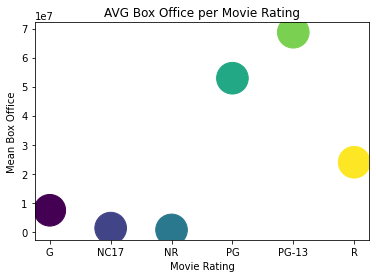

In [220]:
# Plot this data to get a visual idea of which rated movies do better
fig, ax = plt.subplots()
ax.scatter(x=rating_mean['rating'],y=rating_mean['box_office'],c=colors,s=1000)
ax.set_xlabel('Movie Rating')
ax.set_ylabel('Mean Box Office')
ax.set_title('AVG Box Office per Movie Rating');

In [221]:
#Now examine the Max box_office per rating to see if there is any discrepancies
rating_max=rt_movieinfo.groupby(by=rt_movieinfo['rating']).max()
rating_max

,id,synopsis,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
rating,,,,,,,,,,,
G,1965,The movie chronicles the adventures of a young...,Kids and Family|Musical and Performing Arts,Robert Ramirez,Robert Ramirez|Rhett Reese,"Jul 26, 2000","Oct 31, 2000",$,18013938,95 minutes,Warner Bros. Pictures
NC17,1567,Lust is in the air on Harford Road and Sylvia ...,Comedy,John Waters,John Waters,"Sep 24, 2004","Jun 14, 2005",$,1260219,89 minutes,New Line Cinema
NR,1981,With the recent assault on Berlusconi in Milan...,Drama|Horror|Mystery and Suspense,Rakeysh Omprakash Mehra|Rakeysh Omprakesh Mehra,Prasoon Joshi,"Oct 5, 2012","Sep 7, 2010",$,1626289,95 minutes,Variance Films
PG,1968,Youthful wizard Harry Potter returns to the sc...,Science Fiction and Fantasy,Uli Edel|Ulrich Edel,Timothy Hyde Harris|David Bowers|Timothy Harris,"Sep 29, 2006","Sep 5, 2017",$,261835892,97 minutes,Warner Bros. Pictures
PG-13,1980,When five struggling single moms put aside the...,Horror|Mystery and Suspense|Science Fiction an...,Yimou Zhang,Woody Allen,"Sep 30, 2005","Sep 30, 2003",$,303001229,99 minutes,Weinstein Co.
R,1985,Writer/director Lisa Cholodenko follows up her...,Horror|Mystery and Suspense|Science Fiction an...,Yimou Zhang,Yan Geling,"Sep 6, 2013","Sep 9, 2014",$,368000000,99 minutes,Wrekin Hill Entertainment


In [222]:
rating_max=rating_max.drop(['synopsis','genre','id','director','writer','theater_date','dvd_date','runtime'],axis=1)

In [223]:
rating_max=rating_max.reset_index()
rating_mean

,index,rating,box_office
0,0,G,7.402788e+06
1,1,NC17,1.260219e+06
2,2,NR,6.376923e+05
3,3,PG,5.289280e+07
4,4,PG-13,6.872359e+07
5,5,R,2.394827e+07


''

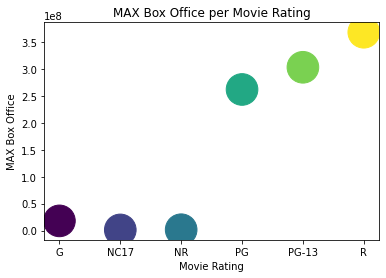

In [224]:
# Now with the Max box_office per movie rating we can visualize the possible ceiling of each movie rating
fig, ax = plt.subplots()
ax.scatter(x=rating_max['rating'],y=rating_max['box_office'],c=colors,s=1000)
ax.set_xlabel('Movie Rating')
ax.set_ylabel('MAX Box Office')
ax.set_title('MAX Box Office per Movie Rating')
;

In [225]:
tmdbmovies= pd.read_csv('zippedData/tmdb.movies.csv.gz')
tmdbmovies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [226]:
tnmovie_budgets= pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tnmovie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [227]:
tnmovie_budgets.shape

(5782, 6)

In [228]:
# WOW this data is already fairly clean and does not appear to be missing anything
tnmovie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [229]:
tnmovie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


There are a varierty of objects that need to be moved to numeric form so that they can be manipulated properly. Let's change production_budget,domestic_gross and worldwide_gross to integers.

In [230]:
# Change production_budget to integer
Production_budget=tnmovie_budgets['production_budget']
production_budget_list=[]
for num in Production_budget:
    a= num.replace(',','')
    b= a.replace('$','')
    production_budget_list.append(int(b))
tnmovie_budgets['production_budget']=Production_budget

In [231]:
tnmovie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [232]:
tnmovie_budgets['production_budget'].head()

0    $425,000,000
1    $410,600,000
2    $350,000,000
3    $330,600,000
4    $317,000,000
Name: production_budget, dtype: object

In [233]:
# Add the new integers to the production_budget column in place of the strings
tnmovie_budgets['production_budget']=production_budget_list

In [234]:
# Change worldwide_gross to integer
worldwide_gross= tnmovie_budgets['worldwide_gross']
worldwide_gross_list=[]
for num in worldwide_gross:
    a= num.replace(',','')
    b= a.replace('$','')
    worldwide_gross_list.append(int(b))

In [235]:
len(worldwide_gross_list)

5782

In [236]:
len(tnmovie_budgets['worldwide_gross'])

5782

In [237]:
#Add the new integers to the worldwide_gross column in place of the strings
tnmovie_budgets['worldwide_gross']=worldwide_gross_list

In [238]:
tnmovie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747


In [239]:
# Change domestic_gross column to integer
domestic_gross= tnmovie_budgets['domestic_gross']
domestic_gross_list=[]
for num in domestic_gross:
    a= num.replace(',','')
    b= a.replace('$','')
    domestic_gross_list.append(int(b))

In [240]:
len(tnmovie_budgets['domestic_gross'])

5782

In [241]:
len(domestic_gross_list)

5782

In [242]:
#Add the new integers to the production_budget column in place of the strings
tnmovie_budgets['domestic_gross']=domestic_gross_list

In [243]:
tnmovie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [244]:
tnmovie_budgets['worldwide_profit']= tnmovie_budgets['worldwide_gross']-tnmovie_budgets['production_budget']

In [245]:
tnmovie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [246]:
#Sort by the worst performing movies and rename to maintain original
sorted_by_worst_performing=tnmovie_budgets.sort_values(by=['worldwide_profit'])

In [247]:
##Sort by the best performing movies and rename to maintain original
sorted_by_best_performing=tnmovie_budgets.sort_values(by=['worldwide_profit'],ascending=False)

In [248]:
sorted_by_best_performing.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864


In [249]:
sorted_by_best_performing=sorted_by_best_performing.drop(['release_date','id','production_budget','domestic_gross'
                                                          ,'worldwide_gross'],axis=1)

In [250]:
sorted_by_best_performing.head()

,movie,worldwide_profit
0,Avatar,2351345279
42,Titanic,2008208395
6,Avengers: Infinity War,1748134200
5,Star Wars Ep. VII: The Force Awakens,1747311220
33,Jurassic World,1433854864


In [251]:
sorted_by_best_performing.shape

(5782, 2)

In [252]:
sorted_by_best_performing.set_index(['movie'])

,worldwide_profit
movie,
Avatar,2351345279
Titanic,2008208395
Avengers: Infinity War,1748134200
Star Wars Ep. VII: The Force Awakens,1747311220
Jurassic World,1433854864
...,...
Town & Country,-94635231
Men in Black: International,-106900000
Mars Needs Moms,-110450242


In [253]:
holdx=sorted_by_best_performing['movie'][:10]
holdy=sorted_by_best_performing['worldwide_profit'][:10]

''

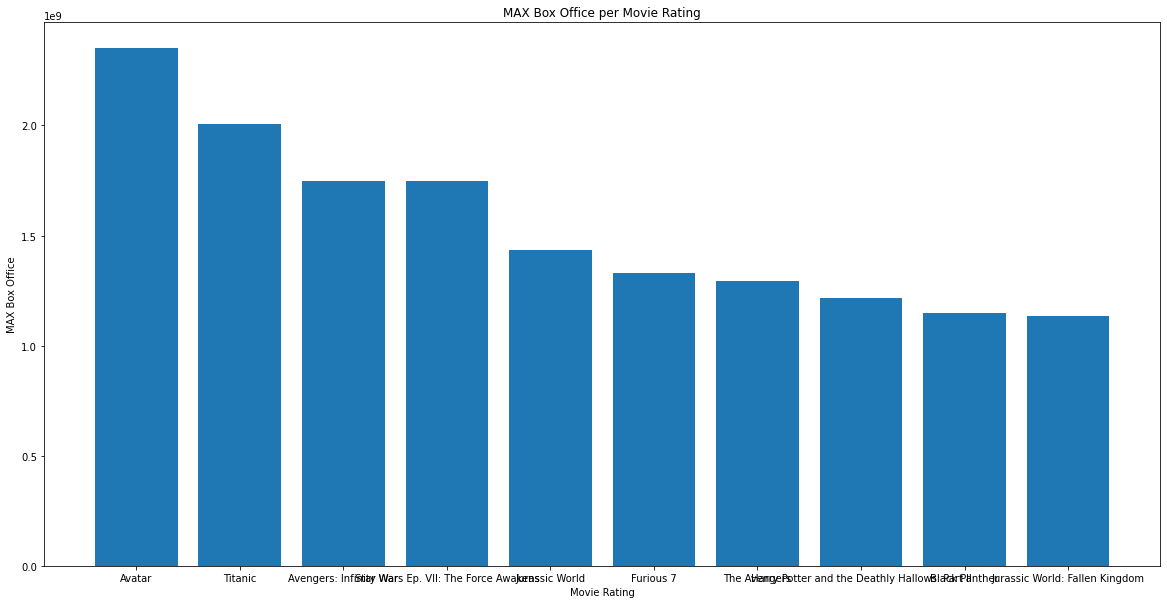

In [256]:
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(x=holdx,height=holdy)
ax.set_xlabel('Movie Rating')
ax.set_ylabel('MAX Box Office')
ax.set_title('MAX Box Office per Movie Rating')
;